# Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the dataset into python environment

In [2]:
data = pd.read_csv("cancer_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data cleaning
Check the columns with null values and return their sum

In [3]:
data.isnull().sum() 

id                         0
diagnosis                  0
radius_mean                0
texture_mean              21
perimeter_mean             0
area_mean                  0
smoothness_mean           48
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean             65
fractal_dimension_mean     0
radius_SE                  0
texture_SE                21
perimeter_SE               0
area_SE                    0
smoothness_SE             48
compactness_SE             0
concavity_SE               0
concave_points_SE          0
symmetry_SE               65
fractal_dimension_SE       0
radius_max                 0
texture_max               21
perimeter_max              0
area_max                   0
smoothness_max            48
compactness_max            0
concavity_max              0
concave_points_max         0
symmetry_max              65
fractal_dimension_max      0
dtype: int64

Fill the NaN cells in the dataset
   - Check for Null values and fill them with column mean

In [4]:
def fillnull(column):
    """This function checks the datatype of the column and fill the null values with its mean"""
    if column.dtype is np.dtype(float):
        return column.fillna(column.mean())
    elif column.dtype is np.dtype(int):
        return column.fillna(column.mean())
    else:
        return column

In [5]:
data = data.apply(fillnull)

In [6]:
# Check if columns has been filled
data.isna().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_SE                 0
texture_SE                0
perimeter_SE              0
area_SE                   0
smoothness_SE             0
compactness_SE            0
concavity_SE              0
concave_points_SE         0
symmetry_SE               0
fractal_dimension_SE      0
radius_max                0
texture_max               0
perimeter_max             0
area_max                  0
smoothness_max            0
compactness_max           0
concavity_max             0
concave_points_max        0
symmetry_max              0
fractal_dimension_max     0
dtype: int64

## Check for duplicated values
5 rows were found to have duplicate in the data, the first occurence was kept

In [7]:
# Check for duplicated values
# 5 rows were found to have duplicate in the data, the first occurence was kept
data[data.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
202,852552,M,16.65,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,...,26.46,31.56,177.00,2215.0,0.18050,0.35780,0.46950,0.20950,0.3613,0.09564
325,89511502,B,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,...,13.71,21.10,88.70,574.4,0.13840,0.12120,0.10200,0.05602,0.2688,0.06888
345,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488
489,9113846,B,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743
558,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,...,15.48,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004


In [8]:
# Dropped duplicated values by keeping first occurence
data.drop_duplicates(keep = "first", inplace = True) # Drop the duplicate rows

In [9]:
data.shape

(564, 32)

In [10]:
# check data types to make sure they are correct.
data.dtypes

id                          int64
diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
radius_SE                 float64
texture_SE                float64
perimeter_SE              float64
area_SE                   float64
smoothness_SE             float64
compactness_SE            float64
concavity_SE              float64
concave_points_SE         float64
symmetry_SE               float64
fractal_dimension_SE      float64
radius_max                float64
texture_max               float64
perimeter_max             float64
area_max                  float64
smoothness_max            float64
compactness_max           float64
concavity_max             float64
concave_points

In [11]:
# Check if duplicated rows has been dropped
data[data.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max


### Exploratory Data Analysis

In [12]:
# This gives a quick overview of basic statistics of the dataset
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
count,5.640000e+02,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,...,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,3.060557e+07,14.120335,19.276458,91.927784,654.047163,0.096096,0.104610,0.088832,0.048967,0.181191,...,16.264254,25.644569,107.226188,880.096277,0.132105,0.255019,0.272300,0.114652,0.289040,0.084054
std,1.255492e+08,3.514862,4.232968,24.221072,350.428965,0.013328,0.052766,0.079158,0.038613,0.026298,...,4.835519,6.077713,33.585720,569.491710,0.021609,0.158284,0.208409,0.065633,0.058884,0.018200
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.690778e+05,11.697500,16.292500,75.135000,420.175000,0.086847,0.065175,0.029540,0.020347,0.163500,...,13.002500,21.187500,84.102500,514.975000,0.118375,0.146900,0.114475,0.064730,0.253000,0.071270
50%,9.060010e+05,13.375000,18.905000,86.415000,551.400000,0.096087,0.094575,0.061680,0.033770,0.181091,...,14.970000,25.515000,97.655000,686.550000,0.132090,0.213000,0.227450,0.100550,0.287600,0.080050
75%,8.873089e+06,15.797500,21.680000,103.925000,782.700000,0.103900,0.130500,0.131950,0.074067,0.193775,...,18.767500,29.350000,125.175000,1074.500000,0.143425,0.340325,0.385300,0.162500,0.310900,0.092120
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


A quick look at 10 random rows of the dataset suggest that the Malignant cancer has a higher texture mean when plotted against the radius mean

Text(0.5, 1.0, 'Sample Plot of Random 10 Rows')

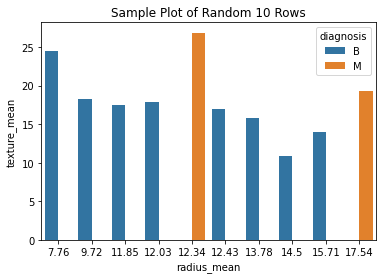

In [13]:
# Exploring the dataset
# A quick look at a random 10 rows of the dataset using the radius mean and texture mean columns
sample = data.sample(10)
sample
sns.barplot(data=sample, x="radius_mean", y="texture_mean", hue="diagnosis");
plt.title("Sample Plot of Random 10 Rows")

C:\Users\TEMITOPE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


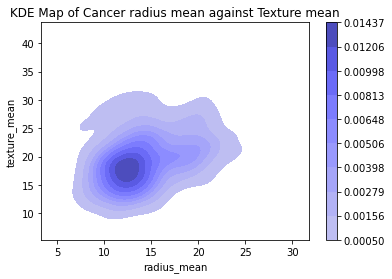

In [24]:
# A look at the the density map shows the concentration of radius mean value at 15
sns.kdeplot(data.radius_mean,data.texture_mean, color="blue", shade= True, cbar= True)
plt.title("KDE Map of Cancer radius mean against Texture mean");

In [15]:
# The following table shows the correlation of the dataset.
data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
id,1.000000,0.075607,0.102670,0.074114,0.098309,-0.011705,-0.001029,0.050553,0.044276,-0.024495,...,0.082945,0.066221,0.080605,0.107834,0.009561,-0.004040,0.023186,0.035191,-0.043616,-0.031074
radius_mean,0.075607,1.000000,0.331186,0.997860,0.987259,0.164835,0.503133,0.673538,0.821903,0.143403,...,0.969622,0.301933,0.964873,0.940721,0.111963,0.411011,0.521646,0.741997,0.151770,0.008460
texture_mean,0.102670,0.331186,1.000000,0.337239,0.327695,-0.031267,0.248914,0.310958,0.300357,0.059612,...,0.364372,0.912349,0.371456,0.355187,0.061187,0.291935,0.311284,0.304108,0.092931,0.131731
perimeter_mean,0.074114,0.997860,0.337239,1.000000,0.986278,0.199778,0.554102,0.712921,0.850334,0.177461,...,0.969810,0.308117,0.970342,0.941323,0.141476,0.453603,0.558673,0.769114,0.177428,0.052458
area_mean,0.098309,0.987259,0.327695,0.986278,1.000000,0.168539,0.494469,0.681669,0.821821,0.147273,...,0.963271,0.292213,0.959139,0.959465,0.114239,0.387394,0.506210,0.718935,0.131065,0.004355
smoothness_mean,-0.011705,0.164835,-0.031267,0.199778,0.168539,1.000000,0.619859,0.495531,0.527979,0.475315,...,0.201075,0.033121,0.227862,0.193065,0.798387,0.435654,0.410892,0.475318,0.334616,0.453431
compactness_mean,-0.001029,0.503133,0.248914,0.554102,0.494469,0.619859,1.000000,0.882998,0.830033,0.580099,...,0.534229,0.255524,0.588885,0.507293,0.528872,0.865923,0.815361,0.815065,0.510129,0.688678
concavity_mean,0.050553,0.673538,0.310958,0.712921,0.681669,0.495531,0.882998,1.000000,0.920147,0.487944,...,0.687715,0.305918,0.728617,0.674262,0.423686,0.756092,0.882768,0.860114,0.406146,0.517849
concave_points_mean,0.044276,0.821903,0.300357,0.850334,0.821821,0.527979,0.830033,0.920147,1.000000,0.447900,...,0.831243,0.296886,0.856487,0.809366,0.429544,0.667695,0.749400,0.909376,0.372024,0.370951
symmetry_mean,-0.024495,0.143403,0.059612,0.177461,0.147273,0.475315,0.580099,0.487944,0.447900,1.000000,...,0.181697,0.075385,0.212988,0.174409,0.366352,0.452688,0.413539,0.418305,0.710563,0.413845


Text(0.5, 1.0, 'CORRELATION PLOT BETWEEN RADIUS MEAN AND PERIMETER MEAN')

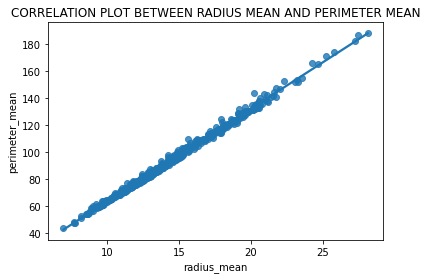

In [16]:
# The regression plot shows a Strong positive correlation between radius mean and perimeter mean in the dataset
sns.regplot(x = data["radius_mean"], y =data["perimeter_mean"] )
plt.title("Correlation plot between radius mean and perimeter mean".upper())

Text(0.5, 1.0, 'CORRELATION PLOT BETWEEN RADIUS MEAN AND FRACTAL DIMENSION MEAN')

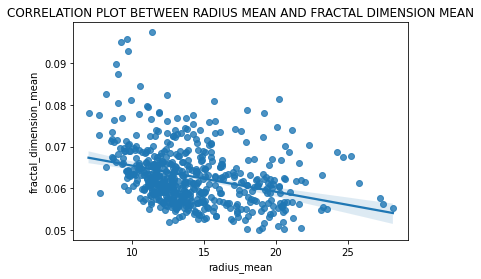

In [17]:
# There is negative correlation between radius mean and fractual dimension dimension mean
# that means an increase in radius mean does not translate to an increase in dimension mean
sns.regplot(x = data["radius_mean"], y =data["fractal_dimension_mean"])
plt.title("Correlation plot between radius mean and fractal dimension mean".upper())

Text(0.5, 1.0, 'Strip plot of diagnosis against radius mean')

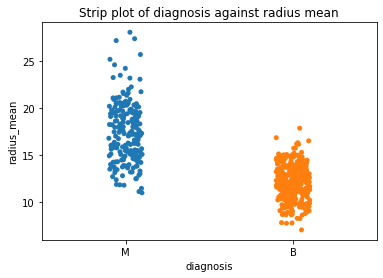

In [18]:
# The stripplot shows that the Malignant cancer has a higher radius mean than the benign cancer
sns.stripplot(data = data , x = "diagnosis" , y = "radius_mean");
plt.title("Strip plot of diagnosis against radius mean")

##### Which cancer type has the  higher radius mean?
The figure below shows that the Malignant cancer has a slightly higher radius mean than the benign cancer

In [19]:
avg_texture = data["texture_mean"].mean()
avg_texture

19.276457524460348

In [20]:
high_texure = data.query("texture_mean > 19.27")
low_texture = data.query("texture_mean < 18.27") 

Text(0.5, 1.0, 'Bar plot Showing texture mean of Malignant against benign Cancer')

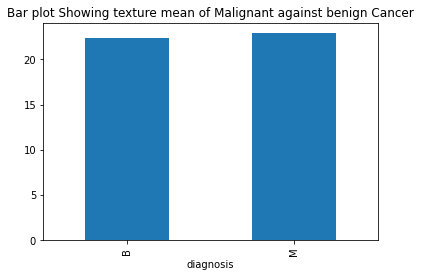

In [21]:
high_texure.groupby("diagnosis")["texture_mean"].mean().plot(kind = "bar");
plt.title("Bar plot Showing texture mean of Malignant against benign Cancer")

#### what is the relationship between certain variables in the dataset?
The figure below shows the relationship between the perimeter and the radius mean variable of the dataset. Both variable are skew to the left while having concentration of high values between 11 and 14, 76 and 80 respectively 

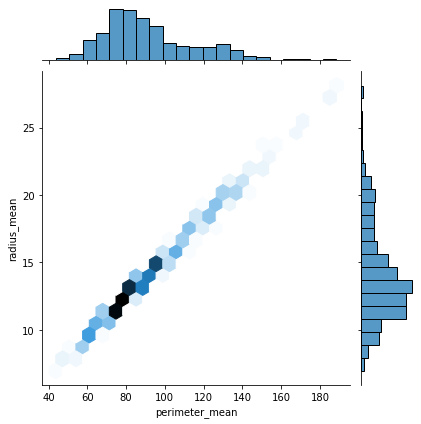

In [22]:
sns.jointplot(x="perimeter_mean", y = "radius_mean", data=data,  kind= "hex");

In [28]:
reduced_data = data.loc[np.random.choice(data.shape[0],100)]
#sns.pairplot(data=reduced_data, kind="scatter", hue= "diagnosis")

In [29]:
reduced_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
217,8811779,B,10.20,17.48,65.05,321.2,0.096087,0.05907,0.05774,0.01071,...,11.48,24.47,75.40,403.7,0.13209,0.1397,0.19250,0.03571,0.2868,0.07809
90,861648,B,14.62,24.02,94.57,662.7,0.089740,0.08606,0.03102,0.02957,...,16.11,29.11,102.90,803.7,0.11150,0.1766,0.09189,0.06946,0.2522,0.07246
355,9010258,B,12.56,19.07,81.92,485.8,0.096087,0.10380,0.10300,0.04391,...,13.37,22.43,89.02,547.4,0.13209,0.2002,0.23880,0.09265,0.2121,0.07188
259,88725602,M,15.53,33.56,103.70,744.9,0.106300,0.16390,0.17510,0.08399,...,18.49,49.54,126.30,1035.0,0.18830,0.5564,0.57030,0.20140,0.3512,0.12040
7,84458202,M,13.71,20.83,90.20,577.9,0.118900,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.16540,0.3682,0.26780,0.15560,0.3196,0.11510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,859283,M,14.78,23.94,97.40,668.3,0.096087,0.14790,0.12670,0.09029,...,17.31,33.39,114.60,925.1,0.13209,0.3416,0.30240,0.16140,0.3321,0.08911
262,888570,M,17.29,22.13,114.40,947.8,0.089990,0.12730,0.09697,0.07507,...,20.39,27.24,137.90,1295.0,0.11340,0.2867,0.22980,0.15280,0.3067,0.07484
495,914333,B,14.87,20.21,96.12,680.9,0.095870,0.08345,0.06824,0.04951,...,16.01,28.48,103.90,783.6,0.12160,0.1388,0.17000,0.10170,0.2369,0.06599
120,865137,B,11.41,10.82,73.34,403.3,0.093730,0.06685,0.03512,0.02623,...,12.82,15.97,83.74,510.5,0.15480,0.2390,0.21020,0.08958,0.3016,0.08523


plotting the area mean against the area max shows that the malignant cancer has a higher distribution across all the variables

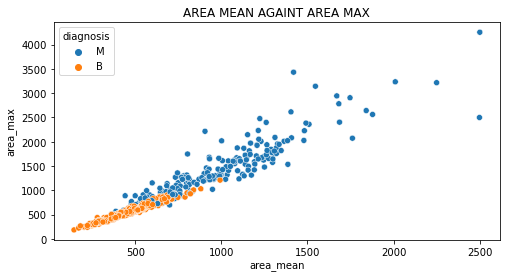

In [30]:
plt.figure(figsize=(8,4))
plt.title("area mean againt area max".upper())
sns.scatterplot(data = data, x="area_mean", y="area_max", hue="diagnosis");

In [ ]:
save = data.to_csv("cleaned_cancer_data.csv")